In [ ]:
# this mounts your Google Drive to the Colab VM.
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# enter the foldername in your Drive where you have saved the unzipped
# assignment folder, e.g. 'cs231n/assignments/assignment3/'
FOLDERNAME = 'AI/Lidar_3D_Object_Detection'
assert FOLDERNAME is not None, "[!] Enter the foldername."

# now that we've mounted your Drive, this ensures that
# the Python interpreter of the Colab VM can load
# python files from within it.
import sys
sys.path.append('/content/drive/My Drive/{}'.format(FOLDERNAME))

# this downloads the CIFAR-10 dataset to your Drive
# if it doesn't already exist.
%cd /content/drive/My\ Drive/$FOLDERNAME/
#!bash get_datasets.sh
#%cd /content

Mounted at /content/drive
/content/drive/My Drive/AI/Lidar_3D_Object_Detection


Building the dependencies

In [ ]:
!python setup.py build_ext --inplace

running build_ext


In [ ]:
#modify the data_dir in config file
%pycat /content/drive/My Drive/AI/Lidar_3D_Object_Detection/config.py

## **Running the training (Tensorflow=2.3.1, keras=2.1.2)**

In [ ]:
!python train.py \
--strategy="all" \
--n_epochs=16 \
--batch_size=2 \
--learning_rate=0.001 \
--small_addon_for_BCE=1e-6 \
--max_gradient_norm=5 \
--alpha_bce=1.5 \
--beta_bce=1 \
--huber_delta=3 \
--dump_vis="no" \
--data_root_dir="/content/drive/My Drive/AI/Lidar_3D_Object_Detection/crop_data" \
--model_dir="model" \
--model_name="model6" \
--dump_test_interval=3 \
--summary_interval=2 \
--summary_val_interval=40 \
--summary_flush_interval=20 \
--ckpt_max_keep=10 \

In [ ]:
#%load_ext tensorboard

#%tensorboard --logdir summary_logdir

## **Visualizing the Training results with Tensorboard (tensorflow_estimator==2.3.0)**

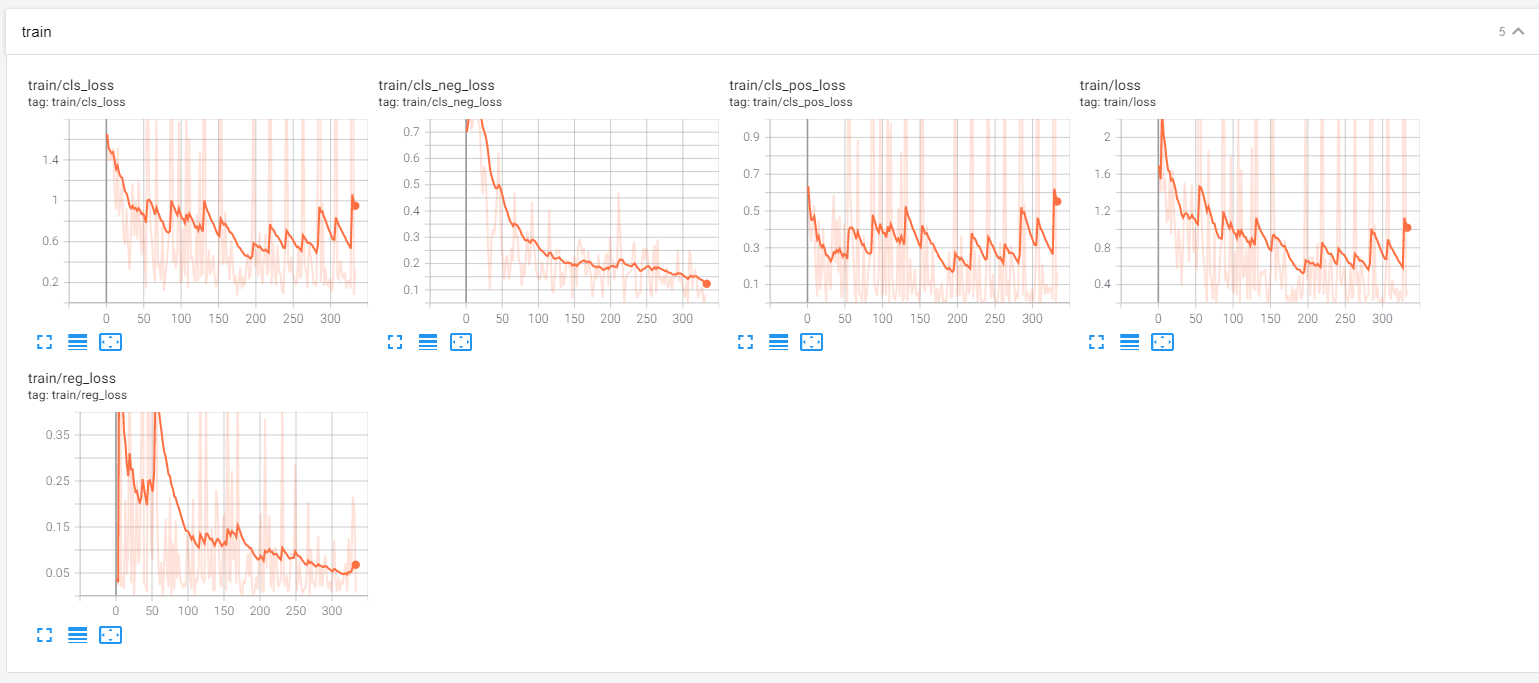

Making Predictions

In [ ]:
!python predict.py \
--strategy="all" \
--batch_size=2 \
--dump_vis="yes" \
--data_root_dir="/content/drive/My Drive/AI/Lidar_3D_Object_Detection/crop_data" \
--dataset_to_test="validation" \
--model_dir="model" \
--model_name="model6" \
--ckpt_name="" \

## **Visualization of the predicted bounding boxes**

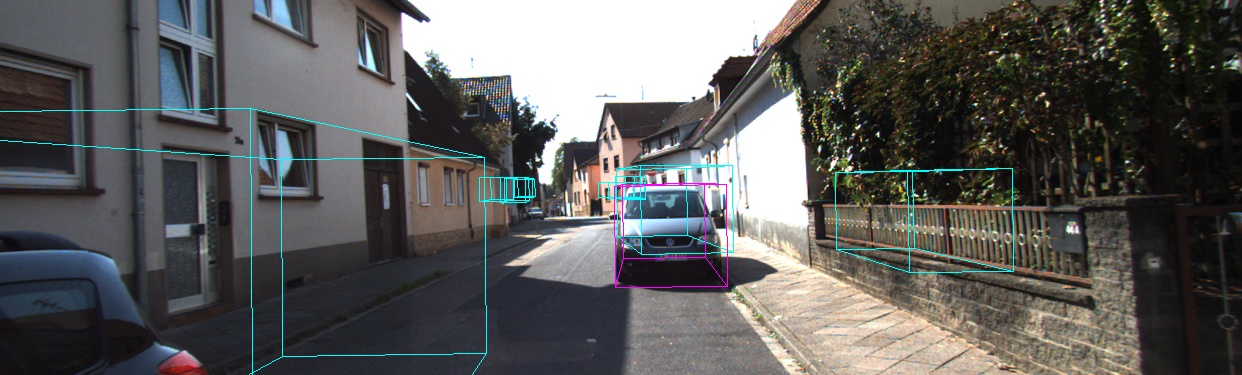

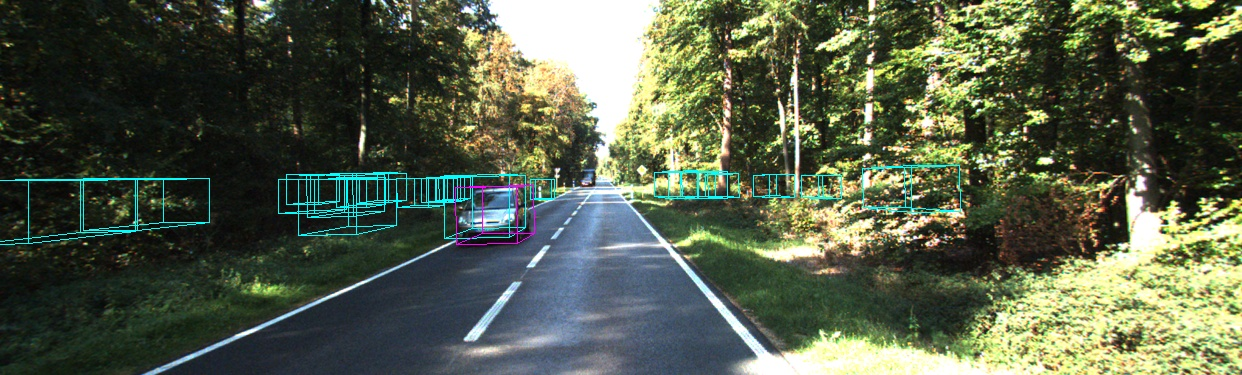

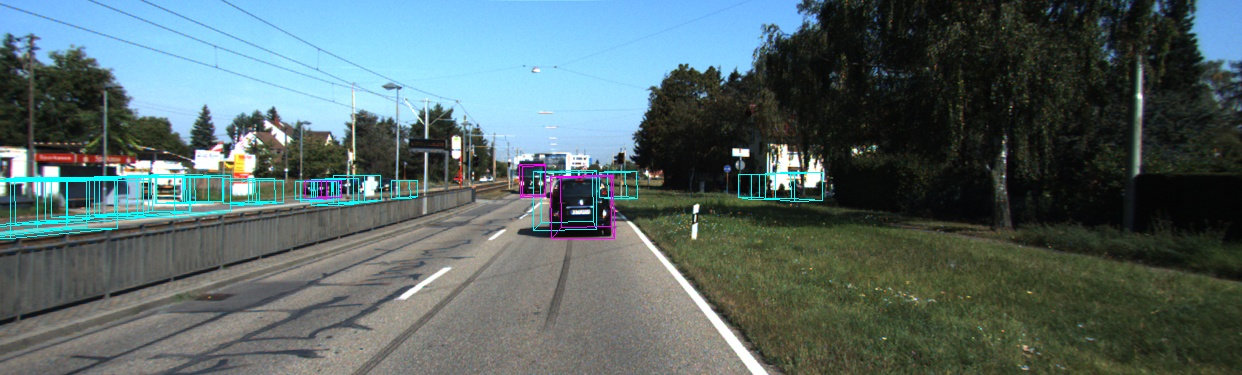

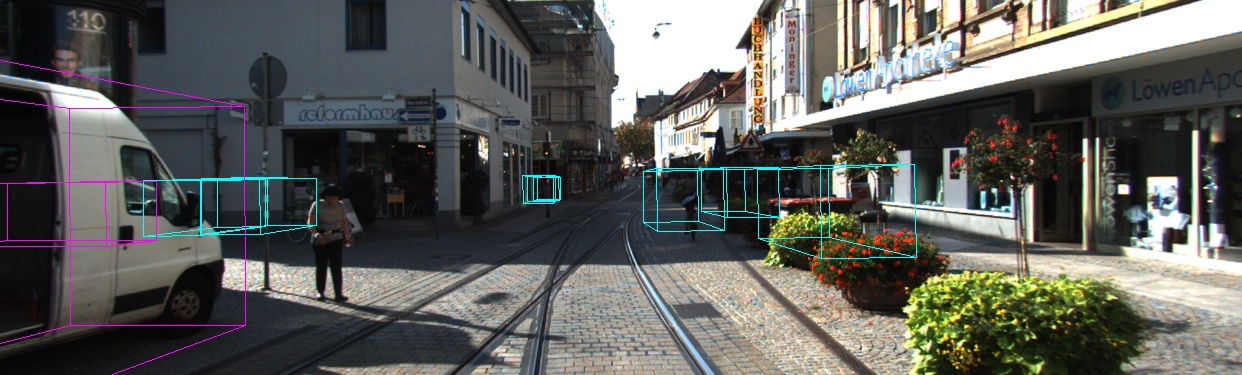

Conclusion: The predicted bounding boxes are decent. The model was trained only with 100 images for 16 epoch, the prediction quality will be improved a lot when trained with more images. 

In [ ]:

import os.path
from os import path
#path.exists("/content/drive/My Drive/subhodip_photo123.png")
path.exists("/content/drive/My Drive/AI/Lidar_3D_Object_Detection/model.py")

True

In [ ]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Wed_Jul_22_19:09:09_PDT_2020
Cuda compilation tools, release 11.0, V11.0.221
Build cuda_11.0_bu.TC445_37.28845127_0


In [ ]:
!nvidia-smi

Sat Apr 24 17:57:40 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.19.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import tensorflow as tf
print(tf.__version__)
!python -c 'import keras; print(keras.__version__)'

2.3.1
Using TensorFlow backend.
2021-04-24 19:47:59.190794: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2.1.2


In [ ]:
!python --version

Python 3.7.10


In [ ]:
#!pip3 uninstall tensorflow_estimator
!pip install -U tensorflow_estimator==2.3.0

In [ ]:
!pip install tensorflow==2.3.1
#%tensorflow_version 2.x
import tensorflow as tf
print(tf.__version__)

In [ ]:
!pip install keras==2.1.2